<a href="https://colab.research.google.com/github/matteoalberti/Lectures_introCV_Experis2020/blob/main/DL4CV_2_1_Architecture_Modeule_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome!**

# Introduction to Machine Learning for Computer Vision

#### Deeper Architectures:  Visual Geometry Group Network [VGG]


## **Lecturer :** Matteo Alberti

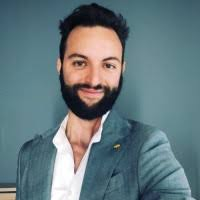

*Contacts :* https://www.linkedin.com/in/matteo-alberti-170493/


# Summary

- <font color=C24024>**Deep Convolutional Neural Networks** </font> : [VGG Net]

- <font color=CA4A2F>**Hands-On** </font> : from Paper to Code

- <font color=F4C52D>**Exercises & Tips** </font>

Paper : [VERY DEEP CONVOLUTIONAL NETWORKS
FOR LARGE-SCALE IMAGE RECOGNITION, Karen Simonyan & Andrew Zisserman+](https://github.com/matteoalberti/Lectures_introCV_Experis2020/blob/main/docs/VGG.pdf)

In [18]:
#TF Imports
import tensorflow as tf

import numpy as np
import datetime


#Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

## Write the architecture : Read the paper and compile!

In [2]:
input_shape = (###)

In [3]:
#Instantiate an empty model --> Sequential or Functional?

def build_VGG(input_shape, n_classes):
    
    return tf.keras.models.Sequential([
        
        ###
        
        
        
    ])

In [ ]:
#Define
VGG_model = build_VGG(input_shape=input_shape, n_classes=1000)

#Compile architecture
VGG_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Show
VGG_model.summary()


# Adapt an architecture to our Domain!

*Test on Cifar10! Load data from tf.keras.datasets (Just for this time ;))*

Or you can try with local data loading and solve step-by-step each problem!

## Test on Cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

In [ ]:
#The range for each individual colour is 0-255

## PREPROCESSING

In [6]:
# NEW SHAPE!
input_shape = ()

In [ ]:
# Define Model
VGG_model = build_VGG()

#Compile architecture
VGG_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Show
VGG_model.summary()

In [8]:
# define callbacks -----> REMEMBER TO SET A DIFFERENT FOLDER EACH TIME

%load_ext tensorboard
log_dir = "logs/fit/VGG/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [23]:
# TRAIN NETWORK!


In [1]:
# Evaluate ACC and LOSS



### Do you wanna ad hoc plot? Build it with matplotlib

In [14]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [19]:
plot_model_history(history_VGG)

In [ ]:
labelNames = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

# How CNN Classifies an Image?
img_idx = 3
plt.imshow(x_test[img_idx],aspect='auto')
print('Actual label:', labelNames[x_test[img_idx]])
# Preper image to predict
test_image =np.expand_dims(x_test[img_idx], axis=0)
print('Input image shape:',test_image.shape)
print('Predict Label:',labelNames[VGG_model.predict_classes(test_image,batch_size=1)[0]])
print('\nPredict Probability:\n', VGG_model.predict(test_image,batch_size=1))


## Notes :

- The padding is chosen as 1 pixel so the spatial resolution is preserved through the convolutional layers. Thus, the spatial resolution will only change at the pooling layers
- The pooling layer does not learn anything
- fully-connected layers : Activation size previous layer * Activation size actual layer + 1

### Do you want to check other VGG Net configurations easly?


In [ ]:
vgg16 = tf.keras.applications.VGG16(
    include_top=True, weights='imagenet', input_tensor=None, input_shape=None,
    pooling=None, classes=1000, classifier_activation='softmax')

vgg16.summary()

### Parameters :

https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16